/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/he

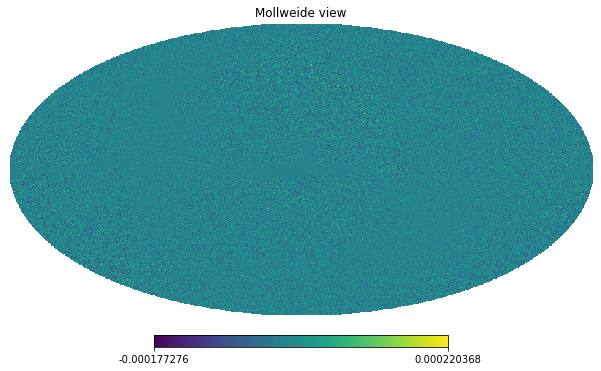

In [9]:
cmb_map_in = hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits", field=1)
hp.mollview(cmb_map_in)
plt.show()

(6144,)


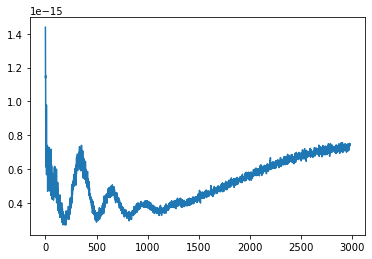

In [19]:
plt.plot(cmb_spec_in[20:3000])
print(cmb_spec_in.shape)

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_0_0_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy


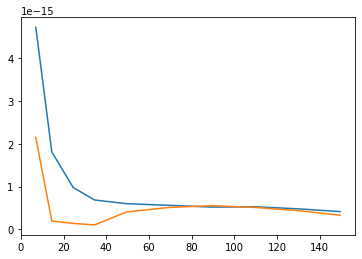

In [37]:
smica_spec = io.load_data(io.spec_sc_path_name+'SMICA.npy')[0,0,:]
# plt.xlim((10,30))
def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)
plt.plot(np.mean(const.SMICA_lowell_bins,axis=1), bin_it(cmb_spec_in, bins=const.SMICA_lowell_bins))
plt.plot(np.mean(const.SMICA_lowell_bins,axis=1), smica_spec*1e-12)
# plt.ylim((0,1e-5))


In [7]:
import numpy as np
import pandas as pd
from healpy.sphtfunc import smoothing
import smica
import os
import json
import component_separation
import component_separation.io as io
import healpy as hp
import component_separation.MSC.MSC.pospace as ps
import component_separation.powspec as pw
import component_separation.preprocess as prep
from component_separation.cs_util import Config as csu
from component_separation.cs_util import Constants as const
from component_separation.cs_util import Helperfunctions as hpf
from component_separation.cs_util import Planckf, Planckr, Plancks
import matplotlib.pyplot as plt
with open(os.path.dirname(component_separation.__file__)+'/config.json', "r") as f:
    cf = json.load(f)
    
import platform
uname = platform.uname()
if uname.node == "DESKTOP-KMIGUPV":
    mch = "XPS"
else:
    mch = "NERSC"
bins = const.linear_equisized_bins_100
signal = pd.read_csv(
        cf[mch]['powspec_truthfile'],
        header=0,
        sep='    ',
        index_col=0)
spectrum_trth = signal["Planck-"+"EE"].to_numpy()

def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)

<ipython-input-7-ece8d18711b8>:28: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  signal = pd.read_csv(


In [24]:
tf = io.load_data(cf[mch]['outdir_misc_ap']+"tf.npy")
pixwin = hp.sphtfunc.pixwin(2048, pol=True, lmax=1800)
cmb_in = io.load_data(cf[mch]['outdir_misc_ap']+"cmb_spec_in.npy")
smica_spec = io.load_data(io.spec_sc_path_name+'SMICA.npy')[0,0,:]
C_lN = io.load_data(io.noise_sc_path_name)
C_lS_bn =  spectrum_trth[:4000+1]/hpf.llp1e12(np.arange(0,4001,1))*1e12


loaded /global/cscratch1/sd/sebibel/misc/tf.npy
loaded /global/cscratch1/sd/sebibel/misc/cmb_spec_in.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy
loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim_diff/SPEC0200_NPIPE_sim_diff_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy


<ipython-input-24-87b883b7c0a1>:6: RuntimeWarning: invalid value encountered in true_divide
  C_lS_bn =  spectrum_trth[:4000+1]/hpf.llp1e12(np.arange(0,4001,1))*1e12


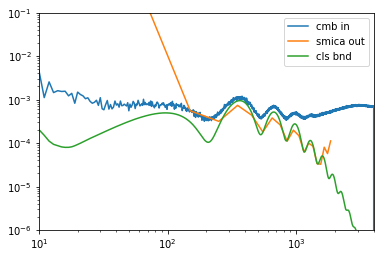

In [8]:
plt.plot(cmb_in[1,:]*1e12, label='cmb in')
plt.plot(np.mean(bins,axis=1), smica_spec, label='smica out')
plt.plot(C_lS_bn, label = 'cls bnd')
# plt.plot(pixwin[1][::100])
plt.xlim((1e1,4e3))
plt.legend()
plt.ylim((1e-6,1e-1))
plt.xscale('log')
plt.yscale('log')

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy
loaded /global/cscratch1/sd/sebibel/misc/cmb_spec_in.npy
(19,)
(6, 6144)


(1e-07, 0.01)

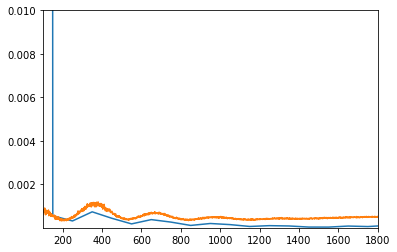

In [36]:
smica_spec = io.load_data(io.spec_sc_path_name+'SMICA.npy')[0,0,:]
cmb_spec_in = io.load_data(cf[mch]['outdir_misc_ap']+"cmb_spec_in.npy")
print(smica_spec.shape)
print(cmb_spec_in.shape)
plt.plot(np.mean(bins,axis=1), smica_spec)
plt.plot(cmb_spec_in[1,:]*1e12)
plt.xlim((100,1800))
plt.ylim((1e-7,1e-2))

The following plot is more or less 

(200.0, 1800.0)

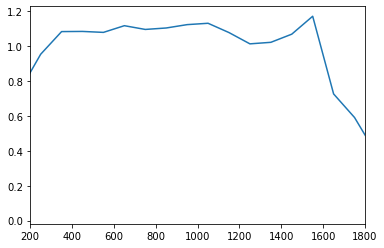

In [38]:
plt.plot(np.mean(bins,axis=1), np.sqrt(bin_it(C_lS_bn, bins=bins)/smica_spec))
plt.xlim((200,1800))

(0.0, 0.001)

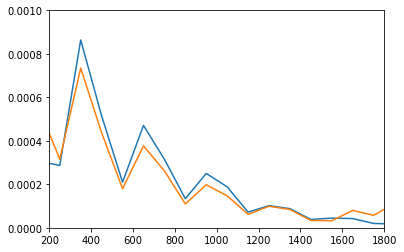

In [32]:
plt.plot(np.mean(bins,axis=1), bin_it(C_lS_bn, bins=bins))
plt.plot(np.mean(bins,axis=1), smica_spec)
plt.xlim((200,1800))
plt.ylim((0,0.001))

In [3]:
cmb_map_in = hp.read_map("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits", field=(0,1,2))
cmb_spec_in = hp.anafast(cmb_map_in)

/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:391: UserWarning: NSIDE = 2048
  warnings.warn("NSIDE = {0:d}".format(nside))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/healpy-1.14.0-py3.8-linux-x86_64.egg/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/global/homes/s/sebibel/.local/cori/3.8-anaconda-2020.11/lib/python3.8/site-packages/he

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npySMICA.npy


In [ ]:
def bin_it(data, bins, offset=0):
    ret = np.ones(len(bins))
    for k in range(bins.shape[0]):
        ret[k] = np.mean(np.nan_to_num(data[int(bins[k][0]):int(bins[k][1])]))
    return np.nan_to_num(ret)

plt.plot(cmb_spec_in[1,:], label='planck cmb in')
plt.plot(np.mean(bins,axis=1), smica_spec*1e-12, label='smica out')
plt.plot(spectrum_trth)
plt.legend()
plt.ylim((1e-17,1e-14))
plt.yscale("log")

In [34]:
from astropy.io import fits
hdul = fits.open("/global/cfs/cdirs/cmb/data/planck2018/pr3/cmbmaps/dx12_v3_smica_cmb_raw.fits")

In [38]:
print(hdul[1].data.field(1).shape)
hdul[1].header
i = hdul[1].data.field(0).reshape(-1)
q = hdul[1].data.field(1).reshape(-1)
u = hdul[1].data.field(2).reshape(-1)

(49152, 1024)


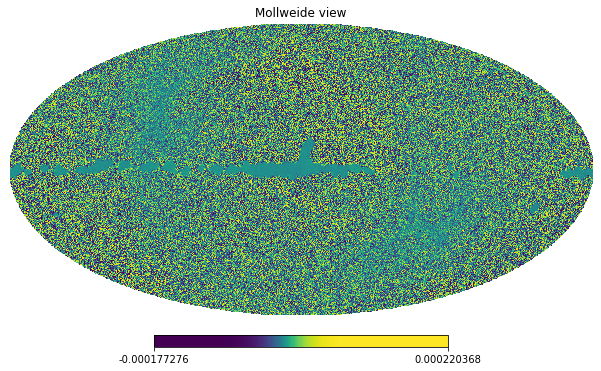

In [44]:
hp.mollview(q,norm='hist')

In [45]:
cmb_spec_in = hp.anafast([i,q,u])

In [46]:
print(cmb_spec_in.shape)
plt.plot(np.mean(bins,axis=1), tf*1e-6/(hp.sphtfunc.gauss_beam(0.00145444, lmax=1800, pol=True)[1,::100]/pixwin[1][::100]))
plt.show()

(6, 6144)


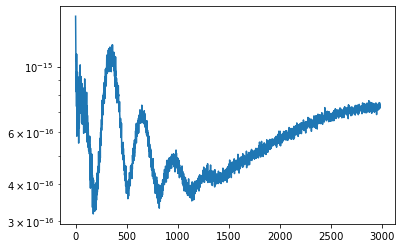

In [51]:
plt.plot(cmb_spec_in[1][20:3000])
plt.yscale("log")

In [53]:
syndata = io.load_data("/global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPECSYN0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy_5mean.npy")

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPECSYN0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy_5mean.npy


<ipython-input-85-943e59c0ff15>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(indata[freqc]['EE']/syndata[freqc]['EE'], label=freqc, alpha=0.5)
<ipython-input-85-943e59c0ff15>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(indata[freqc]['EE']/syndata[freqc]['EE'], label=freqc, alpha=0.5)
<ipython-input-85-943e59c0ff15>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(indata[freqc]['EE']/syndata[freqc]['EE'], label=freqc, alpha=0.5)


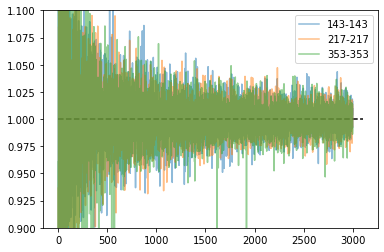

In [85]:
for freqc in csu.freqcomb:
    if freqc.split('-')[0] == freqc.split('-')[1] and freqc.split('-')[0]>str(100):
        plt.plot(indata[freqc]['EE']/syndata[freqc]['EE'], label=freqc, alpha=0.5)
#         plt.plot(syndata[freqc]['EE'], label=freqc)
plt.legend()
plt.ylim((0.9,1.1))
plt.hlines(1,0,3100,color="black", ls='--')
# plt.yscale('log')

In [62]:
indata = io.load_data("/global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy")

loaded /global/cscratch1/sd/sebibel/spectrum/NPIPE_sim/SPEC0200_NPIPE_sim_lens_3000_6000_5_2_030,044,070,100,143,217,353_TT,EE,BB,TE_Full.npy


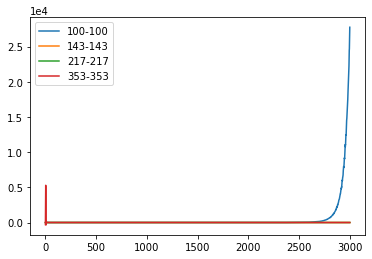

In [65]:
for freqc in csu.freqcomb:
    if freqc.split('-')[0] == freqc.split('-')[1] and freqc.split('-')[0]>=str(100):
        plt.plot(indata[freqc]['EE'], label=freqc)
plt.legend()